# STAGE II - VIRTUAL ENVIRONMENT OPTIMIZATION

![FIGURE](STAGE-II.png)

## DEPENDENCIES

In [1]:
# COMMON
import numpy as np
import sys
import os
import random
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Triggering Mechanism
import triggering as trig

# Signal Processing
from scipy import signal  # for signal processing
from scipy.signal import hilbert  # for signal processing
import prenn # for deep learning

# AI
import keras

import tensorflow as tf # for deep learning
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import TensorBoard # for visualization

import onnxruntime as ort # for onnx runtime

# Visualization
# %matplotlib qt5
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

import plotly.graph_objs as go
import plotly.io as pio

pio.renderers.default = "notebook"

## CLOSED-LOOP CONTROL COMPONENTS SETUP

### ENVIRONMENT

IN NATURE - THE SYNTHESIZED RESPONSE DATA

In [4]:
# Corrected Paths
AVPath = r'../DATA/SYN_RES/RESPONSE_AV.npy'
EQPath = r'../DATA/SYN_RES/RESPONSE_EQ.npy'
IPPath = r'../DATA/SYN_RES/RESPONSE_IP.npy'
SWPath = r'../DATA/SYN_RES/RESPONSE_SW.npy'

# Load Data
RESPONSE_AV = np.load(AVPath)
RESPONSE_EQ = np.load(EQPath)
RESPONSE_IP = np.load(IPPath)
RESPONSE_SW = np.load(SWPath)

## only use part of the data
raw_len_av = RESPONSE_AV.shape[0]
raw_len_eq = RESPONSE_EQ.shape[0]
raw_len_ip = RESPONSE_IP.shape[0]
raw_len_sw = RESPONSE_SW.shape[0]

# this is to simulate the imbalanced data - ensure the same ratio within STAGE III
ratio_aw = 0.2
ratio_eq = 0.2
ratio_ip = 0.2
ratio_sw = 0.2

uselen_aw = int(raw_len_av * ratio_aw)
uselen_eq = int(raw_len_eq * ratio_eq)  
uselen_ip = int(raw_len_ip * ratio_ip)
uselen_sw = int(raw_len_sw * ratio_sw)

# randomly pick uselen_aw samples from RESPONSE_XX, no repeat
idx_aw = random.sample(range(raw_len_av), uselen_aw)
idx_eq = random.sample(range(raw_len_eq), uselen_eq)
idx_ip = random.sample(range(raw_len_ip), uselen_ip)
idx_sw = random.sample(range(raw_len_sw), uselen_sw)

RESPONSE_AV = RESPONSE_AV[idx_aw]
RESPONSE_EQ = RESPONSE_EQ[idx_eq]
RESPONSE_IP = RESPONSE_IP[idx_ip]
RESPONSE_SW = RESPONSE_SW[idx_sw]

## Check Data Info
print(type(RESPONSE_AV))
print('RESPONSE_AV Shape:', RESPONSE_AV.shape)
print(type(RESPONSE_EQ))
print('RESPONSE_EQ Shape:', RESPONSE_EQ.shape)
print(type(RESPONSE_IP))
print('RESPONSE_IP Shape:', RESPONSE_IP.shape)
print(type(RESPONSE_SW))
print('RESPONSE_SW Shape:', RESPONSE_SW.shape)

num_type = 4

signal_length = RESPONSE_AV.shape[1]

LenTS = signal_length

# ratio of non-interested data to interested data
ratio_ni = RESPONSE_AV.shape[0] / (RESPONSE_EQ.shape[0])

print('Ratio of Non-Interested Data to Interested Data:', ratio_ni)

## Stack Data
RESPONSE = np.vstack((RESPONSE_AV, RESPONSE_EQ))

## Total Number of Samples
NumSample = RESPONSE.shape[0]
print('Total Number of Samples:', NumSample) 

<class 'numpy.ndarray'>
RESPONSE_AV Shape: (200, 6000)
<class 'numpy.ndarray'>
RESPONSE_EQ Shape: (200, 6000)
<class 'numpy.ndarray'>
RESPONSE_IP Shape: (200, 6000)
<class 'numpy.ndarray'>
RESPONSE_SW Shape: (200, 6000)
Ratio of Non-Interested Data to Interested Data: 1.0
Total Number of Samples: 400


In [5]:
NUM_AV = RESPONSE_AV.shape[0]
NUM_EQ = RESPONSE_EQ.shape[0]
NUM_IP = RESPONSE_IP.shape[0]
NUM_SW = RESPONSE_SW.shape[0]

#print
print('Number of AV:', NUM_AV)
print('Number of EQ:', NUM_EQ)
print('Number of IP:', NUM_IP)
print('Number of SW:', NUM_SW)

Number of AV: 200
Number of EQ: 200
Number of IP: 200
Number of SW: 200


### SYSTEM
IN NATURE - THE TRIGGERING MECHANISM

In [6]:
# embodied in the triggering.py

In [7]:
# determine the search space by check the maximum and minimum of the data - ambient vibration
max_noise = np.max(abs(RESPONSE_AV))
min_noise = np.min(abs(RESPONSE_AV))
print('Maximum of AV:', max_noise)
print('Minimum of AV:', min_noise)

# determine the lower and upper bound of the search space
ub_factor = 2
lb_factor = 0.01

Maximum of AV: 0.017593391247796544
Minimum of AV: 0.0


In [8]:
# configuration

## para_a stands for the triggering threshold amplitude (continuous)
para_a_lb = lb_factor*(max_noise + min_noise)/2
para_a_ub = ub_factor*(max_noise + min_noise)/2

print('Lower Bound of para_a:', para_a_lb)
print('Upper Bound of para_a:', para_a_ub)

## para_b stands for the triggering threshold duration (discrete integer)
para_b_lb = 2
para_b_ub = 10

print('Lower Bound of para_b:', para_b_lb)
print('Upper Bound of para_b:', para_b_ub)

Lower Bound of para_a: 8.796695623898272e-05
Upper Bound of para_a: 0.017593391247796544
Lower Bound of para_b: 2
Upper Bound of para_b: 10


In [12]:
# test
test_data = RESPONSE_AV[0]

para_a = 0.001
para_b = 2

trig_flg = trig.activation(test_data, para_a, para_b)
print(trig_flg[0]) # the first element stands for the triggering flag, and the second element stands for the triggering time

1


### ESTIMATOR
IN NATURE - TRIGGERING MECHANISM & GROUND TRUTH

In [14]:
beta = 2 # beta value to balance the precision and recall

# beta = 100 # beta value to balance the precision and recall

### CONTROLLER
IN NATURE - THE BAYESIAN OPTIMIZATION FRAMEWORK FOR OPTIMIZATION AND CONTROLL

In [15]:
# the bayesian optimization algorithm, will be covered in the next section

## BAYESIAN OPTIMIZATION FRAMEWORK

### Helpers

In [16]:
%pip install PyQt5
%pip install colorama


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
# # use pop-up window for plots
# %matplotlib qt5 
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation
# # print control
# from colorama import init, Fore, Back, Style

In [18]:
# CONFIGURABLE PARAMETERS

## Hyperparameters
noise_lvl = 0.1
k_alpha = 1
k_lambda = 1

## Process Control
num_init_points = 15
num_iter = 30
tolerance = 1e-3
gap = np.inf

## Acquisition Function - UCB
ucb_beta = 2

## Acquisition Function - PI & EI
xi=0.01

## Bonus factor for evaluation
bonus_factor = 1.1

In [19]:
## Search Space
### parameter 1 - a
lb_a = para_a_lb
ub_a = para_a_ub
c_a = (ub_a + lb_a) / 2
print(c_a)

### parameter 2 - b
lb_b = para_b_lb
ub_b = para_b_ub
c_b = (ub_b + lb_b) / 2
print(c_b)

0.008840679102017763
6.0


### The Problem / System to Optimize

Triggering Mechanism： Triggering Parameters In; Evaluation Index Out

In [20]:
# THE OBJECTIVE FUNCTION
def objective_function(para_a, para_b):

    """ Function with unknown internals we wish to maximize.

    This function defines the process to evaluate how good the parameters are for the triggering sensing mechanism.

    INPUT:
    - para_a: the threshold for the activation, positive real number
    - para_b: activate_duration: the duration for the activation, positive integer >= 2 (as we know 1 is not error-prone in practice)

    OUTPUT:
    - evaluation value: F-beta score
    
    HYPERPARAMETERS:
    - beta: the value to balance the precision and recall to calculate F-beta score
    
    """
    
    # assistive variables
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    
    # go through the dataset
    for i in range(NumSample):
    # for i in range(10):  
        # trigger flag
        flg_trigger = 0
        
        # ground truth flag
        flg_class = 0
        flg_interst = 0
        
        # get the response data
        signal = RESPONSE[i, :].reshape(1, -1)
        
        # get the triggering mechanism
        flg_trigger, trig_pos = trig.activation(signal, para_a, para_b)
        
        # print('Trigger Flag:', flg_trigger)
        
        # get the ground truth
        if i < NUM_AV:
            flg_interst = 0
            flag_class = 0
        elif i < NUM_AV + NUM_EQ:
            flg_interst = 1
            flag_class = 1
        elif i < NUM_AV + NUM_EQ + NUM_IP:
            flg_interst = 1
            flag_class = 2
        else:
            flg_interst = 1
            flag_class = 3

        # get the confusion matrix - as the number of interested data is assumed to be small, we need to consider the ratio - only two classes - interested and non-interested
        if flg_trigger == 1 and flg_interst == 1:
            TP += 1*ratio_ni
        elif flg_trigger == 1 and flg_interst == 0:
            FP += 1
        elif flg_trigger == 0 and flg_interst == 1:
            FN += 1*ratio_ni
        elif flg_trigger == 0 and flg_interst == 0:
            TN += 1
        else:
            print('Error in Confusion Matrix Calculation')
            
    # demoninator
    denominator = ((1 + beta**2) * TP + beta**2 * FN + FP)
    if denominator == 0:
        F_beta = 0
        return 0
    
    F_beta = (1 + beta**2) * TP / ((1 + beta**2) * TP + beta**2 * FN + FP)
    
    # if F_beta is NaN, return 0
    if np.isnan(F_beta):
        F_beta = 0
        return 0
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    if precision > 0.9 and recall > 0.9:
        F_beta = F_beta * bonus_factor
    
    # print TP, FP, FN, TN as integer, Precision, Recall, F-beta as float number with 4 decimal places
    print(f'para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: {para_a} {para_b} {int(TP)} {int(FP)} {int(FN)} {int(TN)} {precision:.4f} {recall:.4f} {F_beta:.4f}')


    return F_beta, TP, FP, FN, TN, precision, recall


In [21]:
# THE SURROGATE MODEL - Gaussian Process - Kernel Function
## Matern 2.5 as the kernel function
def kernel(p1, p2, matern_alpha = 1, matern_lambda = 1):
    # define the distance between two points p1 and p2
    d= np.linalg.norm(p1 - p2)
    k = matern_alpha * (1 + np.sqrt(5) * d / matern_lambda + 5 * d**2 / (3 * matern_lambda**2)) * np.exp(-np.sqrt(5) * d / matern_lambda)
    return k

## Mean and Variance of the Gaussian Process
def mean_var(x, D, K_alpha, k_lambda):
    # assume x is a variable of 1x1
    # calculate the mean and variance of the Gaussian Process
    x_dim = x.shape[1] # assume each colum is a dimension of x
    num_D = D.shape[0] # number of data points in D
    
    Ktt = np.zeros((num_D, num_D))
    for i in range(num_D):
        for j in range(num_D):
            Ktt[i, j] = kernel(D[i,:-1], D[j,:-1], K_alpha, k_lambda)
    Kttn = Ktt + np.eye(num_D) * noise_lvl
    IKttn = np.linalg.inv(Kttn)
    
    Kpt = np.zeros((1, num_D))
    for i in range(num_D):
        Kpt[0, i] = kernel(x, D[i,:-1], K_alpha, k_lambda)
    Ktp = Kpt.T
    Kpp = kernel(x, x, K_alpha, k_lambda)
    
    y = D[:,-1].reshape(-1,1)
    
    mean = Kpt @ IKttn @ y
    var = Kpp - Kpt @ IKttn @ Ktp
        
    return mean, var

In [22]:
# THE ACQUISITION FUNCTION - UPPER CONFIDENCE BOUND
def S(x, D):
    mean, var = mean_var(x, D, k_alpha, k_lambda)
    s = mean + ucb_beta * np.sqrt(var) 
    return s

In [23]:
def norm_cdf(x):
    """
    standard normal cumulative distribution function
    
    """
    return 0.5 * (1 + np.math.erf(x / np.sqrt(2)))

In [24]:
def norm_pdf(x):
    """
    standard normal probability density function
    """
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)

In [25]:
# THE ACQUISITION FUNCTION - PROBABILITY OF IMPROVEMENT
def S_PI(x, D, xi=0.01):
    f_best = np.max(D[:,-1])
    mean, var = mean_var(x, D, k_alpha, k_lambda)
    z = (mean - f_best - xi) / np.sqrt(var)
    s = norm_cdf(z)
    return s

In [26]:
# THE ACQUISITION FUNCTION - EXPECTATION OF IMPROVEMENT
def S_EI(x, D, xi=0.01):
    f_best = np.max(D[:,-1])
    mean, var = mean_var(x, D, k_alpha, k_lambda)
    z = (mean - f_best - xi) / np.sqrt(var)
    s = (mean - f_best - xi) * norm_cdf(z) + np.sqrt(var) * norm_pdf(z)
    return s

In [27]:
# THE OPTIMIZATION FUNCTION FOR THE ACQUISITION FUNCTION
def optimize_acquisition(D):
    # randomly search for the point with the highest acquisition function value
    num_search = 100
    max_s = -np.inf
    max_x = None
    cur_x = np.zeros((1,2))
    for i in range(num_search):
        cur_x[0,0] = np.random.uniform(lb_a, ub_a)
        cur_x[0,1] = np.random.uniform(lb_b, ub_b)
        cur_s = S(cur_x, D) # UCB
        # cur_s = S_PI(cur_x, D, xi) # PI
        # cur_s = S_EI(cur_x, D, xi) # EI
        if cur_s > max_s:
            max_s = cur_s
            max_x = cur_x.copy()
    return max_x

### The Optimization Process

In [28]:
# PHASE 1 - INITIAL DATASET
D = np.zeros((num_init_points, 3)) # first column is a, second column is b, third column is the objective function value

DD = np.zeros((num_init_points, 9)) # first column is a, second column is b, third column is the F-beta value, fourth column is TP, fifth column is FP, sixth column is FN, seventh column is TN, eighth column is Precision, ninth column is Recall

for i in range(num_init_points):
    a = np.random.uniform(lb_a, ub_a)
    b = np.random.uniform(lb_b, ub_b)
    D[i, 0] = a
    DD[i, 0] = a
    D[i, 1] = b
    DD[i, 1] = b
    DD[i, 2:] = objective_function(a, b)
    D[i, 2] = DD[i, 2]
    # print progress
    print('Initialization Progress:', i+1, '/', num_init_points)

para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.004573071611603388 8.800189507376896 200 185 0 15 0.5195 1.0000 0.8439
Initialization Progress: 1 / 15
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.007342976031736287 8.714620578245686 200 46 0 154 0.8130 1.0000 0.9560
Initialization Progress: 2 / 15
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.0006634090641888049 6.6382760381048005 200 200 0 0 0.5000 1.0000 0.8333
Initialization Progress: 3 / 15
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.0010708199607479645 5.247356048265737 200 200 0 0 0.5000 1.0000 0.8333
Initialization Progress: 4 / 15
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.0057198511039126205 2.991264072237576 200 199 0 1 0.5013 1.0000 0.8340
Initialization Progress: 5 / 15
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.014613727370586301 9.110600833354226 200 0 0 200 1.0000 1.0000 1.1000


In [29]:
max_val = np.max(D[:,2])
print('Initial Maximum Value:', max_val)

Initial Maximum Value: 1.1


In [30]:
# PHASE 2 - OPTIMIZATION ITERATIONS
for i in range(num_iter):
    
    update_flg = False
    
    tmp = np.zeros((1, 7)) # to store objective function value, TP, FP, FN, TN, Precision, Recall
    
    # (1) use the surrogate model to approach the posterior distribution of the objective function, modeled by Gaussian Process which can be characterized by the mean function and the covariance function
    
    ## mean, var = mean_var(x, D, 1, 1)
    
    # (2) determine the next point to evaluate using the acquisition function S(D)
    x_eval = optimize_acquisition(D)
    
    # (3) evaluate the objective function at the next point
    tmp = objective_function(x_eval[0,0], x_eval[0,1])
    
    f_eval = tmp[0]
    
    # (4) update the dataset D and DD
    newpoint = np.zeros((1,3))
    newpoint[0,0] = x_eval[0,0]
    newpoint[0,1] = x_eval[0,1]
    newpoint[0,2] = f_eval
    D = np.vstack((D, newpoint))
    
    newpoint_d = np.zeros((1,9))
    newpoint_d[0,0] = x_eval[0,0]
    newpoint_d[0,1] = x_eval[0,1]
    newpoint_d[0,2:] = tmp
    DD = np.vstack((DD, newpoint_d))
    
    # # (5) check the stopping criterion
    # gap = np.abs(D[-1, -1] - D[-2, -1])
    # if gap < tolerance:
    #     break
    
    # (5) update the global best value
    if f_eval > max_val:
        max_val = f_eval
        max_x = x_eval
        update_flg = True
    
    # (6) print the progress
    if (update_flg == True):
        print('BO Iteration:', i+1,'/', num_iter, 'Best Value Updated:', max_val, 'at', max_x)
    else:
        print('BO Iteration:', i+1,'/', num_iter)
    
    # (7) reset the flag
    update_flg = False
    

para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.014213247583054416 7.661731140035526 200 0 0 200 1.0000 1.0000 1.1000
BO Iteration: 1 / 30
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.010626386730842258 2.0308799526580668 200 54 0 146 0.7874 1.0000 0.9488
BO Iteration: 2 / 30
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.0009675381409746687 9.958492992293225 200 200 0 0 0.5000 1.0000 0.8333
BO Iteration: 3 / 30
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.00028522567382625137 3.7667629280011594 200 200 0 0 0.5000 1.0000 0.8333
BO Iteration: 4 / 30
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.005460964153747163 8.066597110258922 200 160 0 40 0.5556 1.0000 0.8621
BO Iteration: 5 / 30
para_a / para_b / TP / FP / FN / TN / Precision / Recall / F-beta: 0.0029452084761712946 7.20785578793633 200 198 0 2 0.5025 1.0000 0.8347
BO Iteration: 6 / 30
para_a / para_b / TP / FP / FN / 

In [47]:
# number of points in D
print(D.shape[0])

45


In [48]:
# # VISUALIZATION
# # plot the final dataset in animation, mark the order of the points
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('threshold')
# ax.set_ylabel('duration')
# ax.set_zlabel('F-beta score')
# ax.set_xlim(0, 1.1*ub_a)
# ax.set_ylim(0, 1.1*ub_b)
# ax.set_zlim(0, bonus_factor)

# def update(i):
#     ax.scatter(D[:i, 0], D[:i, 1], D[:i, 2], c='b')
#     ax.text(D[i, 0], D[i, 1], D[i, 2], str(i), color='black')
#     return ax

# ani = FuncAnimation(fig, update, frames=D.shape[0], repeat=False)

# plt.show()

In [49]:
# Visualization
# stem plot

# Assuming D is already defined and contains your data
# D[:, 0] -> threshold
# D[:, 1] -> duration
# D[:, 2] -> F-beta score

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('threshold')
# ax.set_ylabel('duration')
# ax.set_zlabel('F-beta score')
# ax.set_xlim(0, 1.1*ub_a)
# ax.set_ylim(0, 1.1*ub_b)
# ax.set_zlim(0, bonus_factor)

# # Create stem plot
# for i in range(D.shape[0]):
#     x = D[i, 0]
#     y = D[i, 1]
#     z = D[i, 2]
#     ax.plot([x, x], [y, y], [0, z], 'k--')
#     ax.scatter(x, y, z, c='b', marker='o')
#     ax.text(x, y, z, str(i), color='black')

# plt.show()


In [50]:
# print the final value
print(D[-1, -1])

# print the max value
print(np.max(D[:, -1]))

# print the argmax
print(D[np.argmax(D[:, -1]), :-1])

# print the row index of the max value
print(np.argmax(D[:, -1]))

1.092353525322741
1.1
[0.01461373 9.11060083]
5


In [51]:
# save lb_a, ub_a, lb_b, ub_b, noise_lvl, k_alpha, k_lambda, num_init_points, num_iter, tolerance, ucb_beta
np.save('config.npy', np.array([lb_a, ub_a, lb_b, ub_b, noise_lvl, k_alpha, k_lambda, num_init_points, num_iter, tolerance, ucb_beta]))

# save D to a file
np.save('D.npy', D)

# save DD to a file
np.save('DD.npy', DD)

## POST-PROCESSING

In [52]:
# COMMON
import numpy as np
import sys
import os
import random
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Triggering Mechanism
import triggering as trig

# Signal Processing
from scipy import signal  # for signal processing
from scipy.signal import hilbert  # for signal processing
import prenn # for deep learning

# AI
import keras

import tensorflow as tf # for deep learning
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import TensorBoard # for visualization

import onnxruntime as ort # for onnx runtime

# Visualization
# %matplotlib qt5
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [53]:
# load data
D = np.load('D.npy')

# load DD

DD = np.load('DD.npy')

# load config
config = np.load('config.npy')

In [54]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
%pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
%pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
import plotly.graph_objects as go
import numpy as np

# Assuming D is your matrix with three columns
# D[:, 0] is threshold, D[:, 1] is duration, D[:, 2] is F-beta
thresholds = D[:, 0]
durations = D[:, 1]
F_beta = D[:, 2]

# Calculate max values and set axis limits
max_threshold = np.max(thresholds) * 1.2
max_duration = int(np.ceil(np.max(durations)) * 1.2)  # Ensure it's an integer
max_fbeta = np.max(F_beta) * 1.2

# Create a 3D scatter plot
fig = go.Figure()

# Use a red color scale
custom_colorscale = [
    [0.0, 'rgb(255, 200, 200)'],  # Light red
    [1.0, 'rgb(139, 0, 0)']       # Dark red
]

# Add trace for the 3D plot
fig.add_trace(go.Scatter3d(
    x=thresholds,
    y=durations,
    z=F_beta,
    mode='markers',
    marker=dict(size=5, color=F_beta, colorscale=custom_colorscale, colorbar=dict(title="F-beta")),
))

# Set axis labels, font, and axis limits
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Threshold', range=[0, max_threshold], titlefont=dict(family='Times New Roman')),
        yaxis=dict(title='Duration', range=[0, max_duration], titlefont=dict(family='Times New Roman')),
        zaxis=dict(title='F-beta', range=[0, max_fbeta], titlefont=dict(family='Times New Roman')),
        camera=dict(eye=dict(x=1.25, y=1.25, z=1.25), projection=dict(type="perspective"))  # Use perspective projection
    ),
    # title=dict(text="3D Plot of Threshold, Duration, and F-beta", font=dict(family="Times New Roman", size=18)),
    autosize=False,
    width=900,  # Set the width
    height=800,  # Set the height
)

# Save the figure as a static image with the name "virtual.png"
# fig.write_image("virtual.png")

# Show the plot
fig.show()

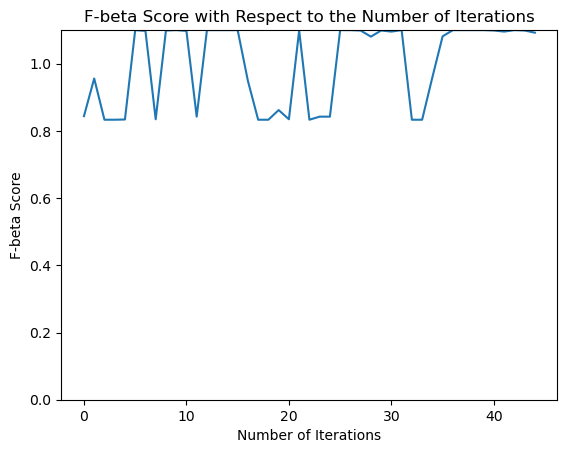

In [58]:
bonus_factor = 1.1
# plot F-beta score with respect to the number of iterations
plt.plot(D[:, 2])
plt.xlabel('Number of Iterations')
plt.ylabel('F-beta Score')
plt.title('F-beta Score with Respect to the Number of Iterations')
# y starts from 0
plt.ylim(0, bonus_factor)
plt.show()

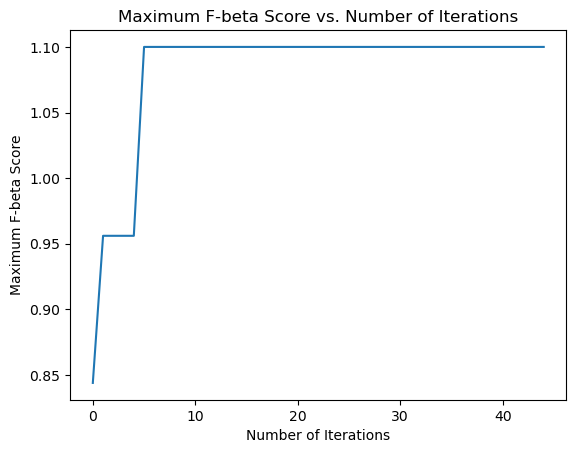

In [59]:
# track the largest F-beta score going through the iterations
max_F_beta = np.zeros(D.shape[0])
for i in range(D.shape[0]):
    max_F_beta[i] = np.max(D[:i+1, 2])

# plot the max_F_beta, the horizontal axis is the number of iterations, the vertical axis is the maximum F-beta score
plt.plot(max_F_beta)
plt.xlabel('Number of Iterations')
plt.ylabel('Maximum F-beta Score')
plt.title('Maximum F-beta Score vs. Number of Iterations')
plt.show()

In [60]:
# # use DD to plot the history or precision, recall, and F-beta score
# iter = np.arange(DD.shape[0])
# precision = DD[:, 6]
# recall = DD[:, 7]
# F_beta = DD[:, 2]

# # use plotly to plot the precision, recall, and F-beta score within one figure, times new roman font

# fig = go.Figure()

# fig.add_trace(go.Scatter(x=iter, y=precision, mode='lines', name='Precision', line=dict(color='blue', width=2)))
# fig.add_trace(go.Scatter(x=iter, y=recall, mode='lines', name='Recall', line=dict(color='red', width=2)))
# fig.add_trace(go.Scatter(x=iter, y=F_beta, mode='lines', name='F-beta', line=dict(color='green', width=2)))

# fig.update_layout(
#     xaxis=dict(title='Number of Iterations', titlefont=dict(family='Times New Roman')),
#     yaxis=dict(title='Value', titlefont=dict(family='Times New Roman')),
#     title=dict(text='Precision, Recall, and F-beta Score vs. Number of Iterations', font=dict(family='Times New Roman', size=18)),
#     autosize=False,
#     width=900,
#     height=600,
# )

# # save the figure as a static image
# fig.write_image('history.png')

# # show the figure
# fig.show()


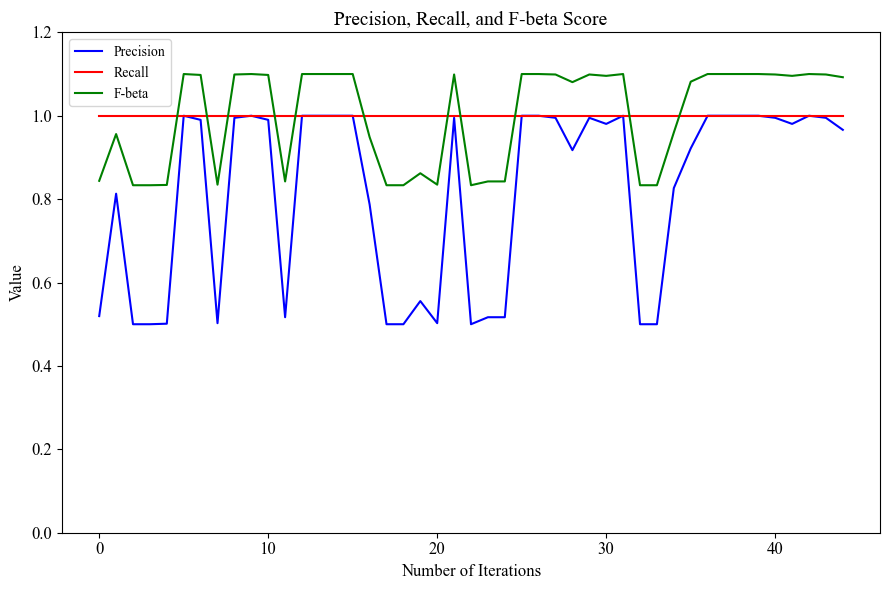

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming DD is a NumPy array containing the data
iterations = np.arange(DD.shape[0])
precision = DD[:, -2]
recall = DD[:, -1]
F_beta = DD[:, 2]

# Set the figure size (9x6 inches roughly corresponds to 900x600 pixels)
plt.figure(figsize=(9, 6))

# Plot each line with specified color and line width
plt.plot(iterations, precision, label='Precision', color='blue', linewidth=1.5)
plt.plot(iterations, recall, label='Recall', color='red', linewidth=1.5)
plt.plot(iterations, F_beta, label='F-beta', color='green', linewidth=1.5)

# Set axis labels and title, using Times New Roman font
plt.xlabel('Number of Iterations', fontname='Times New Roman', fontsize=12)
plt.ylabel('Value', fontname='Times New Roman', fontsize=12)
plt.title('Precision, Recall, and F-beta Score', fontname='Times New Roman', fontsize=14)

# Set y-axis limits from 0 to bonus_factor
plt.ylim(0, bonus_factor+0.1)

# Set tick labels to Times New Roman font
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

# Add legend to the plot and set its font to Times New Roman
plt.legend(prop={'family': 'Times New Roman'})

# Adjust the layout to prevent clipping of labels and titles
plt.tight_layout()

# Save the figure as a static image file
plt.savefig('history.png')

# Display the plot
plt.show()


max f-beta, recall, precision
1.1
1.0
1.0


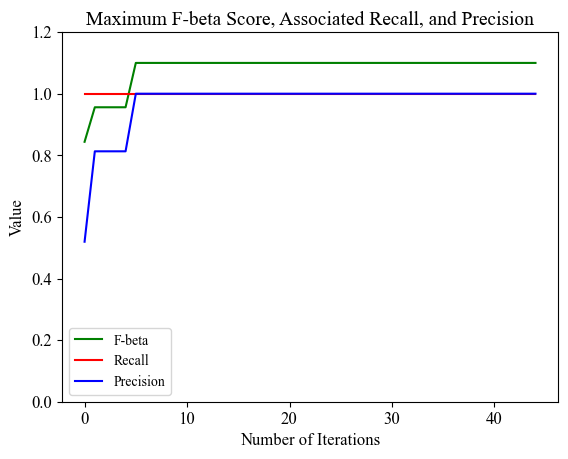

In [65]:
# track the largest F-beta score going through the iterations and record associated recall and precision
iterations = np.arange(DD.shape[0])
max_F_beta = np.zeros(DD.shape[0])
max_associated_recall = np.zeros(DD.shape[0])
max_associated_precision = np.zeros(DD.shape[0])
for i in range(DD.shape[0]):
    max_F_beta[i] = np.max(DD[:i+1, 2])
    max_index = np.argmax(DD[:i+1, 2])
    max_associated_recall[i] = DD[max_index, -1]
    max_associated_precision[i] = DD[max_index, -2]

# print the max_F_beta, recall, and precision
print("max f-beta, recall, precision")
print(max_F_beta[-1])
print(max_associated_recall[-1])
print(max_associated_precision[-1])

# plot the max_F_beta, the horizontal axis is the number of iterations, the vertical axis is the maximum F-beta score, and associated recall and precision

plt.plot(iterations, max_F_beta, label='F-beta', color='green', linewidth=1.5)
plt.plot(iterations, max_associated_recall, label='Recall', color='red', linewidth=1.5)
plt.plot(iterations, max_associated_precision, label='Precision', color='blue', linewidth=1.5)

plt.xlabel('Number of Iterations', fontname='Times New Roman', fontsize=12)
plt.ylabel('Value', fontname='Times New Roman', fontsize=12)
plt.title('Maximum F-beta Score, Associated Recall, and Precision', fontname='Times New Roman', fontsize=14)

# from 0 to bonus_factor
plt.ylim(0, bonus_factor+0.1)

# Set tick labels to Times New Roman font
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

# legend
plt.legend(prop={'family': 'Times New Roman'})

plt.show()
